In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
sys.path.append('../src')
from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_gen import MakeData, MLWrapper, log_effect, ate, att, causalModel

np.random.seed(seed = 0)

### Data Generation

In [3]:
mixture_number = 1
samples_per_mixture = [10000, 10000, 5000]
prior_centers = np.array([[-0.8],[-0.7], [-0.6]])
n_features = 2
#centers = np.array([[0], [6], [9], [12]])
mkd = MakeData()
X1,Y1, centers = mkd.make_blobs(n_samples = 10000, n_features = n_features, centers = 5, return_centers=True,
                             prior_centers = prior_centers, samples_per_mixture = samples_per_mixture,
                             mixture_number = mixture_number)

prior_centers = np.array([[-0.8],[-0.7], [3.5]])

X2,Y2, centers = mkd.make_blobs(n_samples = 10000, n_features = n_features, centers = 5, return_centers=True,
                             prior_centers = prior_centers, samples_per_mixture = samples_per_mixture,
                             mixture_number = mixture_number)

### Plot Data

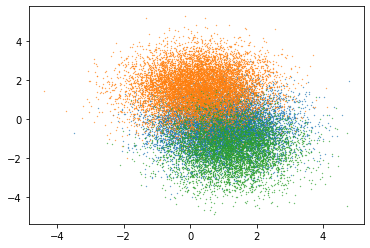

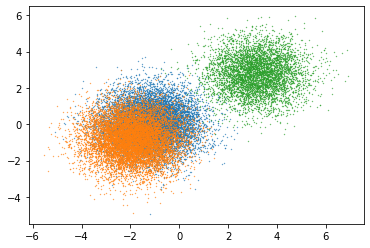

In [4]:
mkd.plot_data(X1, Y1)
mkd.plot_data(X2, Y2)
plt.show()

### set clusters

In [5]:
clusters = int(np.sqrt(len(X1)))

### K-means Clsutering K-means++ initialization

In [6]:
from sklearn.cluster import KMeans


In [7]:
kmeans = KMeans(n_clusters = clusters, random_state = 0)
Y1kmeans = kmeans.fit_predict(X1)
kmeans = KMeans(n_clusters = clusters, random_state = 0)
Y2kmeans = kmeans.fit_predict(X2)

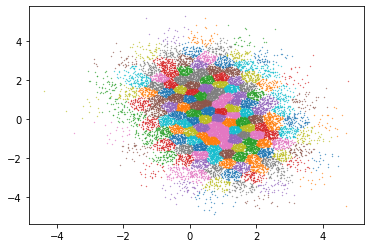

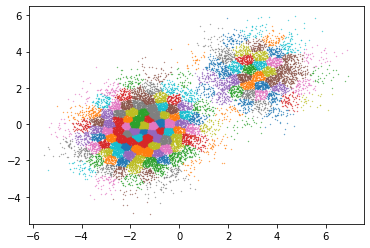

In [8]:
mkd.plot_data(X1, Y1kmeans)
mkd.plot_data(X2, Y2kmeans)
plt.show()

### Agglomerative-Hierarchical  Clustering

#### Analysis of Agglomerative Clustering:
Let $X \in R^d$ be a finite set of points. Then for all $k \in N$ with $k < |X|$ the partition $C_k$ of $X$ into $k$ clusters satisfies: 

$
Cost(C_k) = O(logk) \cdot opt_k
$

In [9]:
%%time
from sklearn.cluster import AgglomerativeClustering as AggClust

agg = AggClust(n_clusters = clusters, linkage = 'ward')
Y1aggWard = agg.fit_predict(X1)

agg = AggClust(n_clusters = clusters, linkage = 'average')
Y1aggAverage = agg.fit_predict(X1)


agg = AggClust(n_clusters = clusters, linkage = 'single')
Y1aggSingle = agg.fit_predict(X1)

agg = AggClust(n_clusters = clusters, linkage = 'complete')
Y1aggComplete = agg.fit_predict(X1)

CPU times: user 1min 6s, sys: 9.34 s, total: 1min 15s
Wall time: 1min 15s


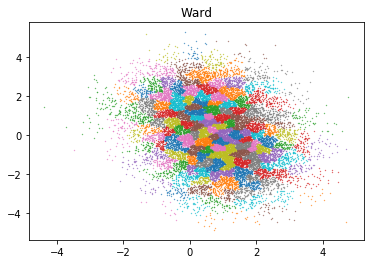

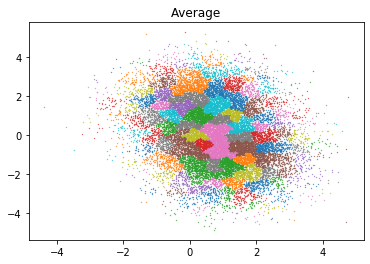

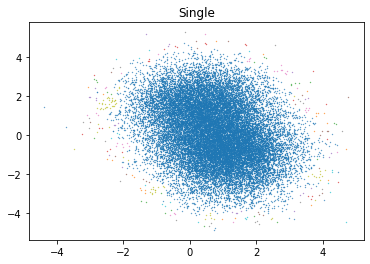

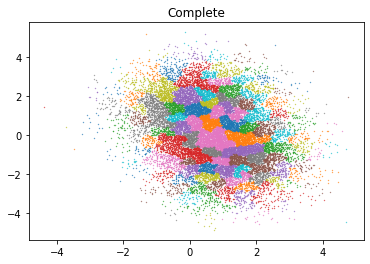

In [10]:
_,ax = mkd.plot_data(X1, Y1aggWard)
ax.set_title('Ward')
_,ax = mkd.plot_data(X1, Y1aggAverage)
ax.set_title('Average')
_, ax = mkd.plot_data(X1, Y1aggSingle)
ax.set_title('Single')
_, ax = mkd.plot_data(X1, Y1aggComplete)
ax.set_title('Complete')

plt.show()

In [11]:
%%time
agg = AggClust(n_clusters = clusters, linkage = 'ward')
Y2aggWard = agg.fit_predict(X2)

agg = AggClust(n_clusters = clusters, linkage = 'average')
Y2aggAverage = agg.fit_predict(X2)


agg = AggClust(n_clusters = clusters, linkage = 'single')
Y2aggSingle = agg.fit_predict(X2)

agg = AggClust(n_clusters = clusters, linkage = 'complete')
Y2aggComplete = agg.fit_predict(X2)

CPU times: user 1min 8s, sys: 8.34 s, total: 1min 16s
Wall time: 1min 16s


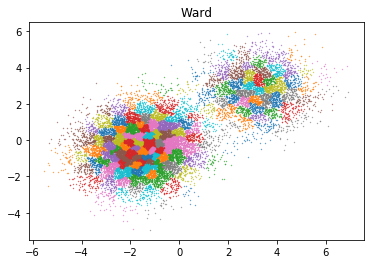

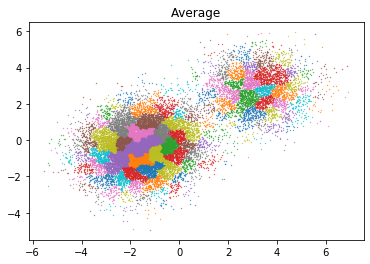

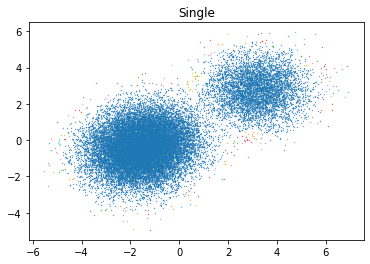

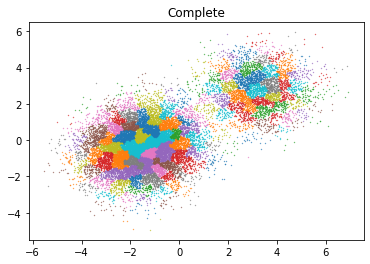

In [12]:
_,ax = mkd.plot_data(X2, Y2aggWard)
ax.set_title('Ward')
_,ax = mkd.plot_data(X2, Y2aggAverage)
ax.set_title('Average')
_, ax = mkd.plot_data(X2, Y2aggSingle)
ax.set_title('Single')
_, ax = mkd.plot_data(X2, Y2aggComplete)
ax.set_title('Complete')

plt.show()

### Spectral Clustering

In [13]:
%%time
from sklearn.cluster import SpectralClustering as SpClust

spclust = SpClust(n_clusters = clusters)
Y1spclust = spclust.fit_predict(X1)

spclust = SpClust(n_clusters = clusters)
Y2spclust = spclust.fit_predict(X2)

CPU times: user 7d 18h 4min 23s, sys: 14h 8min 43s, total: 8d 8h 13min 7s
Wall time: 8h 24min 7s


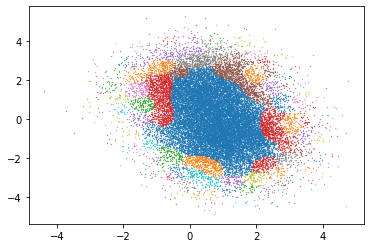

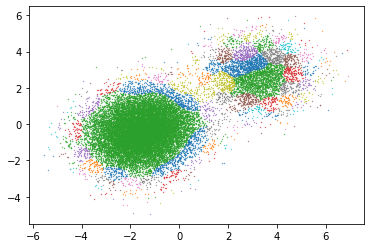

In [15]:
_, ax = mkd.plot_data(X1, Y1spclust)
_, ax = mkd.plot_data(X2, Y2spclust)
